# Import Library

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


# Load Datasets

In [2]:
datasets=pd.read_csv('Cleaned_Laptop_data.csv')
datasets.head()


,brand,model,processor_brand,processor_Name,processor_gnrtn,ram_gb,Apps,ssd,hdd,os,os_bit,graphic_card_gb,weight,display_size,warranty,Touchscreen,msoffice,Price
0,ASUS,Celeron,Intel,5,Missing,4.0,Cooling,0,1024,Windows,64,0,Casual,15.6,1,No,No,23990.0
1,ASUS,VivoBook,Intel,5,10th,4.0,DDR3,512,0,Windows,64,0,Casual,15.6,1,No,No,37990.0
2,ASUS,Vivobook,Intel,A6-9225 Processor,10th,4.0,DDR3,0,1024,Windows,64,0,Casual,14.1,1,No,No,NaN
3,HP,Core,Intel,APU Dual,11th,4.0,DDR3,512,0,Windows,64,0,ThinNlight,15.6,1,No,Yes,54990.0
4,HP,Core,Intel,APU Dual,11th,4.0,DDR3,512,0,Windows,64,0,ThinNlight,15.6,0,No,No,54990.0


# Data Cleaning

# The info() method prints information about the DataFrame.
    1.The information contains the number of columns
    2.Column labels,data types, memory usage, range index
    3.The number of cells in each column (non-null values). Note: the info() method actually prints the info.


In [3]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845 entries, 0 to 844
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            845 non-null    object 
 1   model            845 non-null    object 
 2   processor_brand  845 non-null    object 
 3   processor_Name   845 non-null    object 
 4   processor_gnrtn  845 non-null    object 
 5   ram_gb           845 non-null    float64
 6   Apps             845 non-null    object 
 7   ssd              845 non-null    int64  
 8   hdd              845 non-null    int64  
 9   os               845 non-null    object 
 10  os_bit           845 non-null    int64  
 11  graphic_card_gb  845 non-null    int64  
 12  weight           845 non-null    object 
 13  display_size     845 non-null    object 
 14  warranty         845 non-null    int64  
 15  Touchscreen      845 non-null    object 
 16  msoffice         845 non-null    object 
 17  Price           

### Three record missing in Price Column
1. Apply dropna methode to drop row as per price column missing data.

In [4]:
datasets.dropna(axis=0, subset=['Price'], inplace=True)
datasets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 842 entries, 0 to 844
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            842 non-null    object 
 1   model            842 non-null    object 
 2   processor_brand  842 non-null    object 
 3   processor_Name   842 non-null    object 
 4   processor_gnrtn  842 non-null    object 
 5   ram_gb           842 non-null    float64
 6   Apps             842 non-null    object 
 7   ssd              842 non-null    int64  
 8   hdd              842 non-null    int64  
 9   os               842 non-null    object 
 10  os_bit           842 non-null    int64  
 11  graphic_card_gb  842 non-null    int64  
 12  weight           842 non-null    object 
 13  display_size     842 non-null    object 
 14  warranty         842 non-null    int64  
 15  Touchscreen      842 non-null    object 
 16  msoffice         842 non-null    object 
 17  Price           

In [5]:
datasets.isnull().sum()

brand              0
model              0
processor_brand    0
processor_Name     0
processor_gnrtn    0
ram_gb             0
Apps               0
ssd                0
hdd                0
os                 0
os_bit             0
graphic_card_gb    0
weight             0
display_size       0
warranty           0
Touchscreen        0
msoffice           0
Price              0
dtype: int64

### Find duplicate rows in a Dataframe based on all or selected columns
#### Dataframe.duplicated() method of Pandas.
 

In [8]:
duplicate=datasets[datasets.duplicated()]
duplicate

,brand,model,processor_brand,processor_Name,processor_gnrtn,ram_gb,Apps,ssd,hdd,os,os_bit,graphic_card_gb,weight,display_size,warranty,Touchscreen,msoffice,Price
85,ASUS,VivoBook,AMD,Core i3,Missing,4.0,DDR4,256,1024,Windows,64,0,Casual,15.6,1,No,No,54990.0
94,ASUS,VivoBook,Intel,Core i3,11th,4.0,DDR4,512,0,Windows,64,0,Casual,14,1,No,No,42990.0
276,ASUS,VivoBook,Intel,Core i5,11th,8.0,DDR4,512,0,Windows,64,0,Casual,14,1,No,No,59990.0
278,HP,Pavilion,Intel,Core i5,11th,8.0,DDR4,512,0,Windows,64,0,ThinNlight,15.6,1,No,Yes,63990.0
296,APPLE,2021,Apple,Core i5,Missing,8.0,DDR4,1024,0,Mac,64,0,Casual,14.2,1,No,No,225990.0
313,ASUS,Pentium,Intel,Core i5,Missing,8.0,DDR4,0,1024,Windows,64,0,Casual,15.6,1,No,No,25990.0
336,APPLE,MacBook,Intel,Core i5,10th,8.0,DDR4,1024,0,Mac,64,0,Casual,13,1,No,No,179990.0
389,ASUS,VivoBook,AMD,Core i5,Missing,8.0,DDR4,512,0,Windows,64,0,Casual,14,1,No,No,58990.0
830,Avita,Liber,Intel,Ryzen 9,7th,16.0,LPDDR4X,512,0,Windows,64,0,ThinNlight,13.3,0,No,No,65556.0


# Feature Engineering

In [22]:
object_col_dict={colname:len(datasets[colname].unique()) for colname in datasets.select_dtypes(["category", "object"])}
list_of_tuple=sorted(object_col_dict.items(),key=lambda x:x[1])  
list_of_tuple

[('Touchscreen', 2),
 ('msoffice', 2),
 ('os', 3),
 ('weight', 3),
 ('processor_gnrtn', 8),
 ('processor_brand', 10),
 ('Apps', 14),
 ('brand', 21),
 ('display_size', 22),
 ('processor_Name', 33),
 ('model', 116)]

## Level Encoding for categorical column which unique label count  is 2


In [25]:
for tuple in list_of_tuple[:2]:
    print(tuple[0])

Touchscreen
msoffice


In [26]:
for tuple in list_of_tuple[:2]:
    datasets[tuple[0]], _ = datasets[tuple[0]].factorize() 
datasets.head()

,brand,model,processor_brand,processor_Name,processor_gnrtn,ram_gb,Apps,ssd,hdd,os,os_bit,graphic_card_gb,weight,display_size,warranty,Touchscreen,msoffice,Price
0,ASUS,Celeron,Intel,5,Missing,4.0,Cooling,0,1024,Windows,64,0,Casual,15.6,1,0,0,23990.0
1,ASUS,VivoBook,Intel,5,10th,4.0,DDR3,512,0,Windows,64,0,Casual,15.6,1,0,0,37990.0
3,HP,Core,Intel,APU Dual,11th,4.0,DDR3,512,0,Windows,64,0,ThinNlight,15.6,1,0,1,54990.0
4,HP,Core,Intel,APU Dual,11th,4.0,DDR3,512,0,Windows,64,0,ThinNlight,15.6,0,0,0,54990.0
5,Lenovo,IdeaPad,Intel,APU Dual,10th,4.0,DDR3,0,1024,Windows,64,0,ThinNlight,15.6,1,0,1,35990.0


## Model column has 116 Labels
#### 1.Need to count frequency for every label
#### 2.Replace the frequency with label

In [36]:
list_of_tuple

[('Touchscreen', 2),
 ('msoffice', 2),
 ('os', 3),
 ('weight', 3),
 ('processor_gnrtn', 8),
 ('processor_brand', 10),
 ('Apps', 14),
 ('brand', 21),
 ('display_size', 22),
 ('processor_Name', 33),
 ('model', 116)]

In [37]:
model_map=datasets['model'].value_counts().to_dict()
model_map

{'Core': 87,
 'Inspiron': 73,
 'VivoBook': 49,
 'Vivobook': 36,
 'IdeaPad': 35,
 'Ryzen': 34,
 'Vostro': 33,
 'Pavilion': 33,
 'Ideapad': 30,
 'ROG': 30,
 'Aspire': 23,
 'ZenBook': 21,
 'ExpertBook': 15,
 'Yoga': 14,
 'ASUS': 13,
 'MacBook': 13,
 'Spectre': 12,
 '15s': 12,
 'Legion': 11,
 'Chromebook': 11,
 'TUF': 10,
 'Modern': 10,
 'ThinkPad': 10,
 'Predator': 9,
 '2020': 8,
 'Zenbook': 7,
 'Envy': 6,
 'Swift': 6,
 '2021': 6,
 'Nitro': 5,
 'Gram': 5,
 'OMEN': 5,
 'XPS': 5,
 'Prestige': 5,
 'Zephyrus': 5,
 'HP': 5,
 '14s': 5,
 'GF63': 5,
 'Liber': 5,
 'Pentium': 5,
 'Pro': 4,
 'Intel': 4,
 'E': 4,
 'PURA': 4,
 'Katana': 4,
 'Thinkbook': 4,
 'PureBook': 4,
 'EeeBook': 4,
 'ThinkBook': 3,
 '15': 3,
 'G15': 3,
 'INBook': 3,
 'Notebook': 3,
 'Surface': 3,
 'APU': 3,
 'Pulse': 3,
 'DELL': 2,
 'Sword': 2,
 'INSPIRON': 2,
 'Omen': 2,
 't.book': 2,
 'Stealth': 2,
 'Celeron': 2,
 '15q': 2,
 'G5': 2,
 'GF65': 2,
 'Book': 2,
 'Book(Slim)': 2,
 'x360': 2,
 'Travelmate': 2,
 'WF65': 1,
 'F17': 1,


In [38]:
datasets['model']=datasets['model'].map(model_map)
datasets.head()

,model,processor_brand,processor_gnrtn,ram_gb,Apps,ssd,hdd,os,os_bit,graphic_card_gb,...,processor_Name_Core i5,processor_Name_Core i3,processor_Name_Core i7,processor_Name_Ryzen 5,processor_Name_Ryzen 7,processor_Name_Ryzen 9,processor_Name_Ryzen 3,processor_Name_Celeron Dual,processor_Name_M1 Processor,processor_Name_Pentium Quad
0,2,4,4,4.0,0,0,1024,0,64,0,...,0,0,0,0,0,0,0,0,0,0
1,49,4,3,4.0,1,512,0,0,64,0,...,0,0,0,0,0,0,0,0,0,0
3,87,4,2,4.0,1,512,0,0,64,0,...,0,0,0,0,0,0,0,0,0,0
4,87,4,2,4.0,1,512,0,0,64,0,...,0,0,0,0,0,0,0,0,0,0
5,35,4,3,4.0,1,0,1024,0,64,0,...,0,0,0,0,0,0,0,0,0,0


# Target Guided Ordering Encoding
#### 1.Ordering the labels according to the target
#### 2.Replace the labels by the joint probability of being 1 or 0

In [13]:
datasets.groupby(['processor_brand'])['Price'].mean()

processor_brand
512              149990.000000
AMD               73207.901961
Apple            150033.478261
First            192440.000000
Intel             74278.790620
M.2               55990.000000
MediaTek          22823.333333
NVIDIA           197277.142857
Pre-installed    108176.333333
Qualcomm          38990.000000
Name: Price, dtype: float64

In [14]:
datasets.groupby(['processor_brand'])['Price'].mean().sort_values()

processor_brand
MediaTek          22823.333333
Qualcomm          38990.000000
M.2               55990.000000
AMD               73207.901961
Intel             74278.790620
Pre-installed    108176.333333
512              149990.000000
Apple            150033.478261
First            192440.000000
NVIDIA           197277.142857
Name: Price, dtype: float64

In [15]:
datasets.groupby(['processor_brand'])['Price'].mean().sort_values().index

Index(['MediaTek', 'Qualcomm', 'M.2', 'AMD', 'Intel', 'Pre-installed', '512',
       'Apple', 'First', 'NVIDIA'],
      dtype='object', name='processor_brand')

In [16]:
ordinal_labels=datasets.groupby(['processor_brand'])['Price'].mean().sort_values().index
ordinal_labels

Index(['MediaTek', 'Qualcomm', 'M.2', 'AMD', 'Intel', 'Pre-installed', '512',
       'Apple', 'First', 'NVIDIA'],
      dtype='object', name='processor_brand')

In [17]:
ordinal_labels2={k:i for i,k in enumerate(ordinal_labels,0)}
ordinal_labels2

{'MediaTek': 0,
 'Qualcomm': 1,
 'M.2': 2,
 'AMD': 3,
 'Intel': 4,
 'Pre-installed': 5,
 '512': 6,
 'Apple': 7,
 'First': 8,
 'NVIDIA': 9}

In [18]:
datasets['processor_brand']=datasets['processor_brand'].map(ordinal_labels2)
datasets.head()

,brand,model,processor_brand,processor_Name,processor_gnrtn,ram_gb,Apps,ssd,hdd,os,os_bit,graphic_card_gb,weight,display_size,warranty,Touchscreen,msoffice,Price
0,ASUS,2,4,5,Missing,4.0,Cooling,0,1024,0,64,0,0,15.6,1,0,0,23990.0
1,ASUS,49,4,5,10th,4.0,DDR3,512,0,0,64,0,0,15.6,1,0,0,37990.0
3,HP,87,4,APU Dual,11th,4.0,DDR3,512,0,0,64,0,1,15.6,1,0,1,54990.0
4,HP,87,4,APU Dual,11th,4.0,DDR3,512,0,0,64,0,1,15.6,0,0,0,54990.0
5,Lenovo,35,4,APU Dual,10th,4.0,DDR3,0,1024,0,64,0,1,15.6,1,0,1,35990.0


In [19]:
datasets.processor_gnrtn.value_counts()

11th       333
Missing    303
10th       161
8th         27
7th          9
9th          5
12th         3
4th          1
Name: processor_gnrtn, dtype: int64

In [20]:
datasets.groupby(['processor_gnrtn'])['Price'].mean().sort_values().index

Index(['4th', '7th', '11th', '10th', 'Missing', '8th', '9th', '12th'], dtype='object', name='processor_gnrtn')

# Simple method create for Ordinal Encoding
#### 1- groupby on ordinal categorical type column
#### 2- Mean value of Price column
#### 3- Sort the values
#### 4- indexing
#### 5-Maling a dictionary by using enumerate() Methode
#### 6-Replace as labels

In [29]:
def ordinal_encode(df,ordi_col):
    ordinal_label=df.groupby([ordi_col])['Price'].mean().sort_values().index
    ordinal_label2={k:i for i,k in enumerate(ordinal_label,0)}
    df[ordi_col]=df[ordi_col].map(ordinal_label2)
    return df

In [27]:
for tuple in list_of_tuple[2:7]:
    print(tuple)

('os', 3)
('weight', 3)
('processor_gnrtn', 8)
('processor_brand', 10)
('Apps', 14)


In [31]:
for tuple in list_of_tuple[2:7]:
    ordinal_encode(datasets,tuple[0])
datasets.head()   

,brand,model,processor_brand,processor_Name,processor_gnrtn,ram_gb,Apps,ssd,hdd,os,os_bit,graphic_card_gb,weight,display_size,warranty,Touchscreen,msoffice,Price
0,ASUS,Celeron,4,5,4,4.0,0,0,1024,0,64,0,2,15.6,1,0,0,23990.0
1,ASUS,VivoBook,4,5,3,4.0,1,512,0,0,64,0,2,15.6,1,0,0,37990.0
3,HP,Core,4,APU Dual,2,4.0,1,512,0,0,64,0,0,15.6,1,0,1,54990.0
4,HP,Core,4,APU Dual,2,4.0,1,512,0,0,64,0,0,15.6,0,0,0,54990.0
5,Lenovo,IdeaPad,4,APU Dual,3,4.0,1,0,1024,0,64,0,0,15.6,1,0,1,35990.0


## One Hot Encoding

In [33]:
for tuple in list_of_tuple[7:-1]:
    print(tuple)

('brand', 21)
('display_size', 22)
('processor_Name', 33)


In [34]:
def one_hot_top_x(df,column):
    top_x_labels=df[column].value_counts().sort_values(ascending=False).head(10).index
    print(top_x_labels)
    for label in top_x_labels:
        df[column+'_'+label]=np.where(df[column]==label,1,0)
    df.drop([column],axis=1,inplace=True)
    

In [35]:
for tuple in list_of_tuple[7:-1]:
    print(tuple[0])
    one_hot_top_x(datasets,tuple[0])
datasets.head()

brand
Index(['ASUS', 'DELL', 'Lenovo', 'HP', 'acer', 'MSI', 'APPLE', 'Avita', 'Vaio',
       'LG'],
      dtype='object')
display_size
Index(['15.6', '14', '13.3', '0', '17.3', '14.96', '16', '16.1', '13', '13.4'], dtype='object')
processor_Name
Index(['Core i5', 'Core i3', 'Core i7', 'Ryzen 5', 'Ryzen 7', 'Ryzen 9',
       'Ryzen 3', 'Celeron Dual', 'M1 Processor', 'Pentium Quad'],
      dtype='object')


,model,processor_brand,processor_gnrtn,ram_gb,Apps,ssd,hdd,os,os_bit,graphic_card_gb,...,processor_Name_Core i5,processor_Name_Core i3,processor_Name_Core i7,processor_Name_Ryzen 5,processor_Name_Ryzen 7,processor_Name_Ryzen 9,processor_Name_Ryzen 3,processor_Name_Celeron Dual,processor_Name_M1 Processor,processor_Name_Pentium Quad
0,Celeron,4,4,4.0,0,0,1024,0,64,0,...,0,0,0,0,0,0,0,0,0,0
1,VivoBook,4,3,4.0,1,512,0,0,64,0,...,0,0,0,0,0,0,0,0,0,0
3,Core,4,2,4.0,1,512,0,0,64,0,...,0,0,0,0,0,0,0,0,0,0
4,Core,4,2,4.0,1,512,0,0,64,0,...,0,0,0,0,0,0,0,0,0,0
5,IdeaPad,4,3,4.0,1,0,1024,0,64,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
datasets.drop(feature_OH_Encode,axis=1,inplace=True)
datasets.head()

,model,processor_brand,processor_gnrtn,ram_gb,ssd,hdd,os,os_bit,graphic_card_gb,weight,...,display_size_15.6,display_size_14,display_size_13.3,display_size_0,display_size_17.3,display_size_14.96,display_size_16,display_size_16.1,display_size_13,display_size_13.4
0,2,4,4,4.0,0,1024,0,64,0,0,...,1,0,0,0,0,0,0,0,0,0
1,49,4,3,4.0,512,0,0,64,0,0,...,1,0,0,0,0,0,0,0,0,0
3,87,4,2,4.0,512,0,0,64,0,1,...,1,0,0,0,0,0,0,0,0,0
4,87,4,2,4.0,512,0,0,64,0,1,...,1,0,0,0,0,0,0,0,0,0
5,35,4,3,4.0,0,1024,0,64,0,1,...,1,0,0,0,0,0,0,0,0,0


In [39]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 842 entries, 0 to 844
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   model                        842 non-null    int64  
 1   processor_brand              842 non-null    int64  
 2   processor_gnrtn              842 non-null    int64  
 3   ram_gb                       842 non-null    float64
 4   Apps                         842 non-null    int64  
 5   ssd                          842 non-null    int64  
 6   hdd                          842 non-null    int64  
 7   os                           842 non-null    int64  
 8   os_bit                       842 non-null    int64  
 9   graphic_card_gb              842 non-null    int64  
 10  weight                       842 non-null    int64  
 11  warranty                     842 non-null    int64  
 12  Touchscreen                  842 non-null    int64  
 13  msoffice            

# Normalization and Standardization

## Standardization
#### Standardization means centering varible at zero
#### z=(x-x_mean)/std

#### Standardization:StandardScaler used from sklearn Library

In [46]:
scaler=StandardScaler()
df_scaled=scaler.fit_transform(datasets)
df_scaled= pd.DataFrame(df_scaled, columns =datasets.columns)
df_scaled

,model,processor_brand,processor_gnrtn,ram_gb,Apps,ssd,hdd,os,os_bit,graphic_card_gb,...,processor_Name_Core i5,processor_Name_Core i3,processor_Name_Core i7,processor_Name_Ryzen 5,processor_Name_Ryzen 7,processor_Name_Ryzen 9,processor_Name_Ryzen 3,processor_Name_Celeron Dual,processor_Name_M1 Processor,processor_Name_Pentium Quad
0,-1.065877,0.138140,0.942820,-1.413814,-5.831005,-1.413980,2.224982,-0.326146,0.413607,-0.591990,...,-0.694546,-0.478745,-0.373333,-0.328473,-0.269465,-0.178501,-0.171289,-0.151942,-0.143548,-0.125226
1,0.641304,0.138140,-0.034833,-1.413814,-4.968746,0.211234,-0.451353,-0.326146,0.413607,-0.591990,...,-0.694546,-0.478745,-0.373333,-0.328473,-0.269465,-0.178501,-0.171289,-0.151942,-0.143548,-0.125226
2,2.021578,0.138140,-1.012487,-1.413814,-4.968746,0.211234,-0.451353,-0.326146,0.413607,-0.591990,...,-0.694546,-0.478745,-0.373333,-0.328473,-0.269465,-0.178501,-0.171289,-0.151942,-0.143548,-0.125226
3,2.021578,0.138140,-1.012487,-1.413814,-4.968746,0.211234,-0.451353,-0.326146,0.413607,-0.591990,...,-0.694546,-0.478745,-0.373333,-0.328473,-0.269465,-0.178501,-0.171289,-0.151942,-0.143548,-0.125226
4,0.132782,0.138140,-0.034833,-1.413814,-4.968746,-1.413980,2.224982,-0.326146,0.413607,-0.591990,...,-0.694546,-0.478745,-0.373333,-0.328473,-0.269465,-0.178501,-0.171289,-0.151942,-0.143548,-0.125226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,1.513056,-0.980264,0.942820,1.514316,-3.244226,0.211234,-0.451353,-0.326146,0.413607,-0.591990,...,-0.694546,-0.478745,-0.373333,-0.328473,-0.269465,5.602197,-0.171289,-0.151942,-0.143548,-0.125226
838,0.060136,-0.980264,0.942820,1.514316,-3.244226,0.211234,-0.451353,-0.326146,0.413607,1.332548,...,-0.694546,-0.478745,-0.373333,-0.328473,-0.269465,5.602197,-0.171289,-0.151942,-0.143548,-0.125226
839,-0.993231,0.138140,0.942820,1.514316,-3.244226,-1.413980,-0.451353,-0.326146,0.413607,-0.591990,...,-0.694546,-0.478745,-0.373333,-0.328473,-0.269465,5.602197,-0.171289,-0.151942,-0.143548,-0.125226
840,0.060136,-0.980264,0.942820,1.514316,-3.244226,0.211234,-0.451353,-0.326146,0.413607,0.370279,...,-0.694546,-0.478745,-0.373333,-0.328473,-0.269465,-0.178501,-0.171289,-0.151942,-0.143548,-0.125226


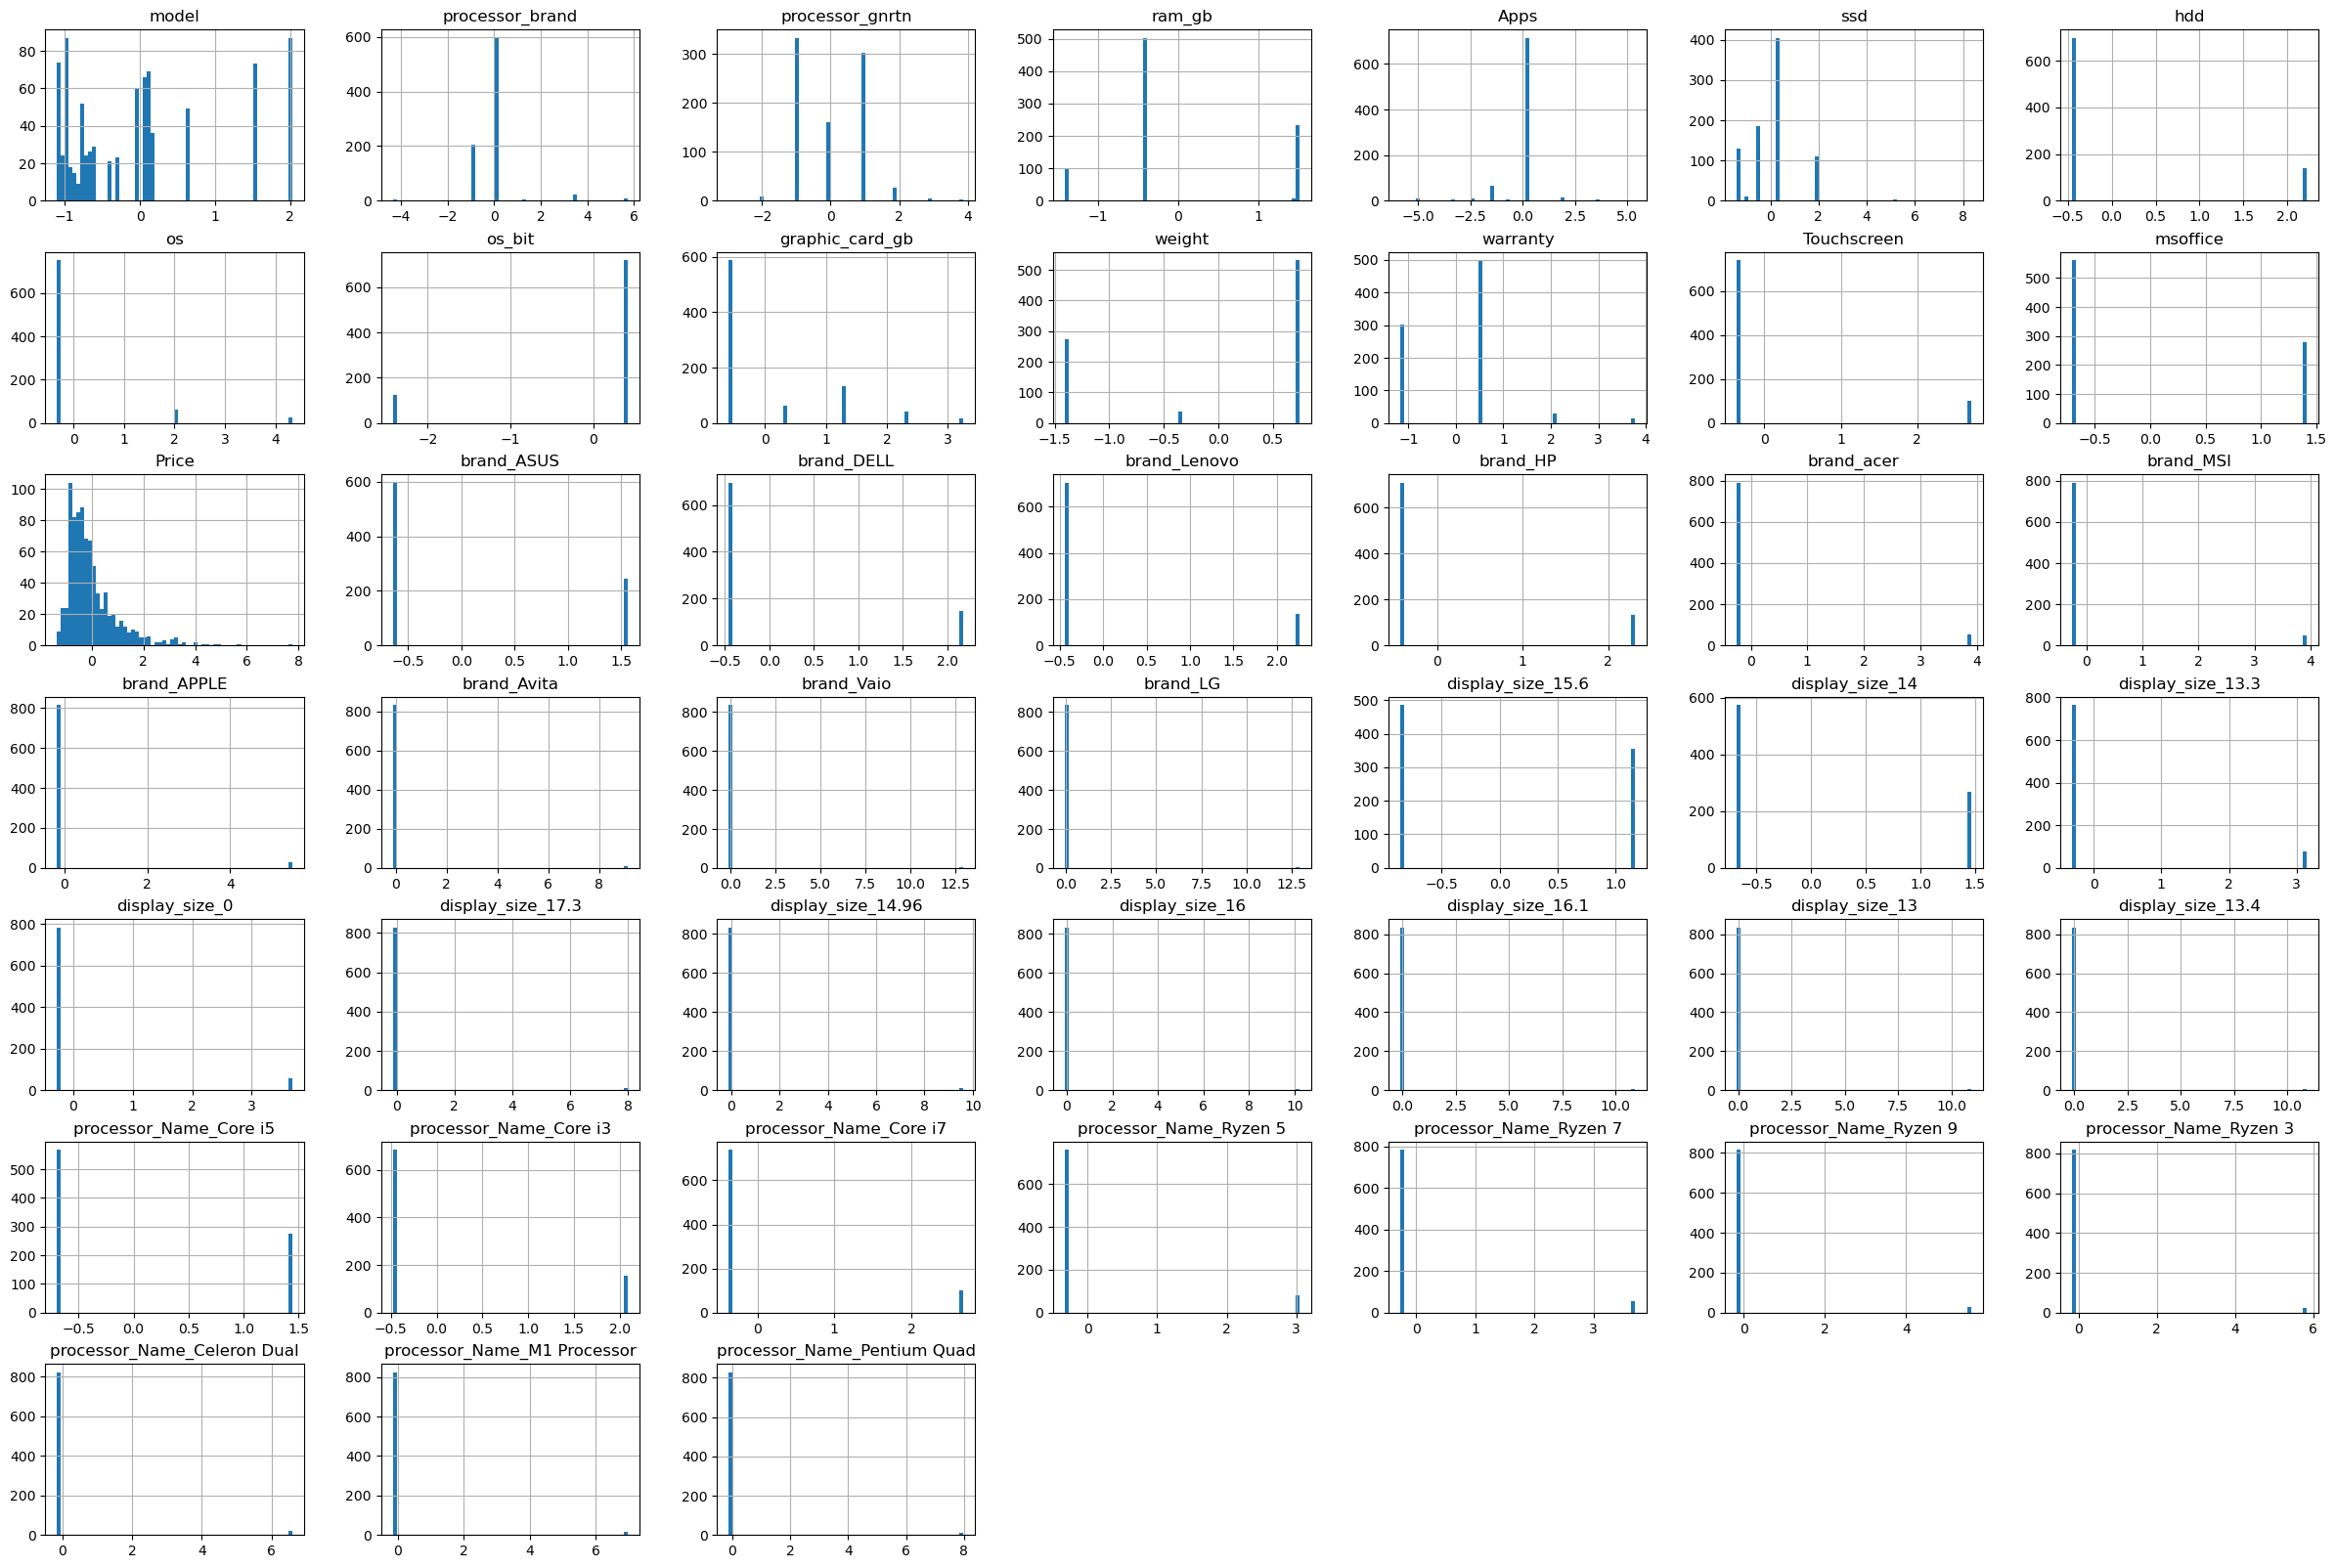

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
df_scaled.hist(bins=60,figsize=(30,20))
plt.show()

## Normalization

#### Normalization refers to the rescaling of the features to a range of [0, 1], which is a special case of min-max scaling. 
#### z=(x-x_min)/(x_max-x_min)

In [61]:
min_max_scaler=MinMaxScaler()
df_minMaxScaled=min_max_scaler.fit_transform(datasets)
df_minMaxScaled= pd.DataFrame(df_minMaxScaled, columns =datasets.columns)
df_minMaxScaled

,model,processor_brand,processor_gnrtn,ram_gb,Apps,ssd,hdd,os,os_bit,graphic_card_gb,...,processor_Name_Core i5,processor_Name_Core i3,processor_Name_Core i7,processor_Name_Ryzen 5,processor_Name_Ryzen 7,processor_Name_Ryzen 9,processor_Name_Ryzen 3,processor_Name_Celeron Dual,processor_Name_M1 Processor,processor_Name_Pentium Quad
0,0.011628,0.444444,0.571429,0.0,0.000000,0.000000,1.0,0.0,1.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.558140,0.444444,0.428571,0.0,0.076923,0.166667,0.0,0.0,1.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.444444,0.285714,0.0,0.076923,0.166667,0.0,0.0,1.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.444444,0.285714,0.0,0.076923,0.166667,0.0,0.0,1.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.395349,0.444444,0.428571,0.0,0.076923,0.000000,1.0,0.0,1.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,0.837209,0.333333,0.571429,1.0,0.230769,0.166667,0.0,0.0,1.0,0.00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
838,0.372093,0.333333,0.571429,1.0,0.230769,0.166667,0.0,0.0,1.0,0.50,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
839,0.034884,0.444444,0.571429,1.0,0.230769,0.000000,0.0,0.0,1.0,0.00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
840,0.372093,0.333333,0.571429,1.0,0.230769,0.166667,0.0,0.0,1.0,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


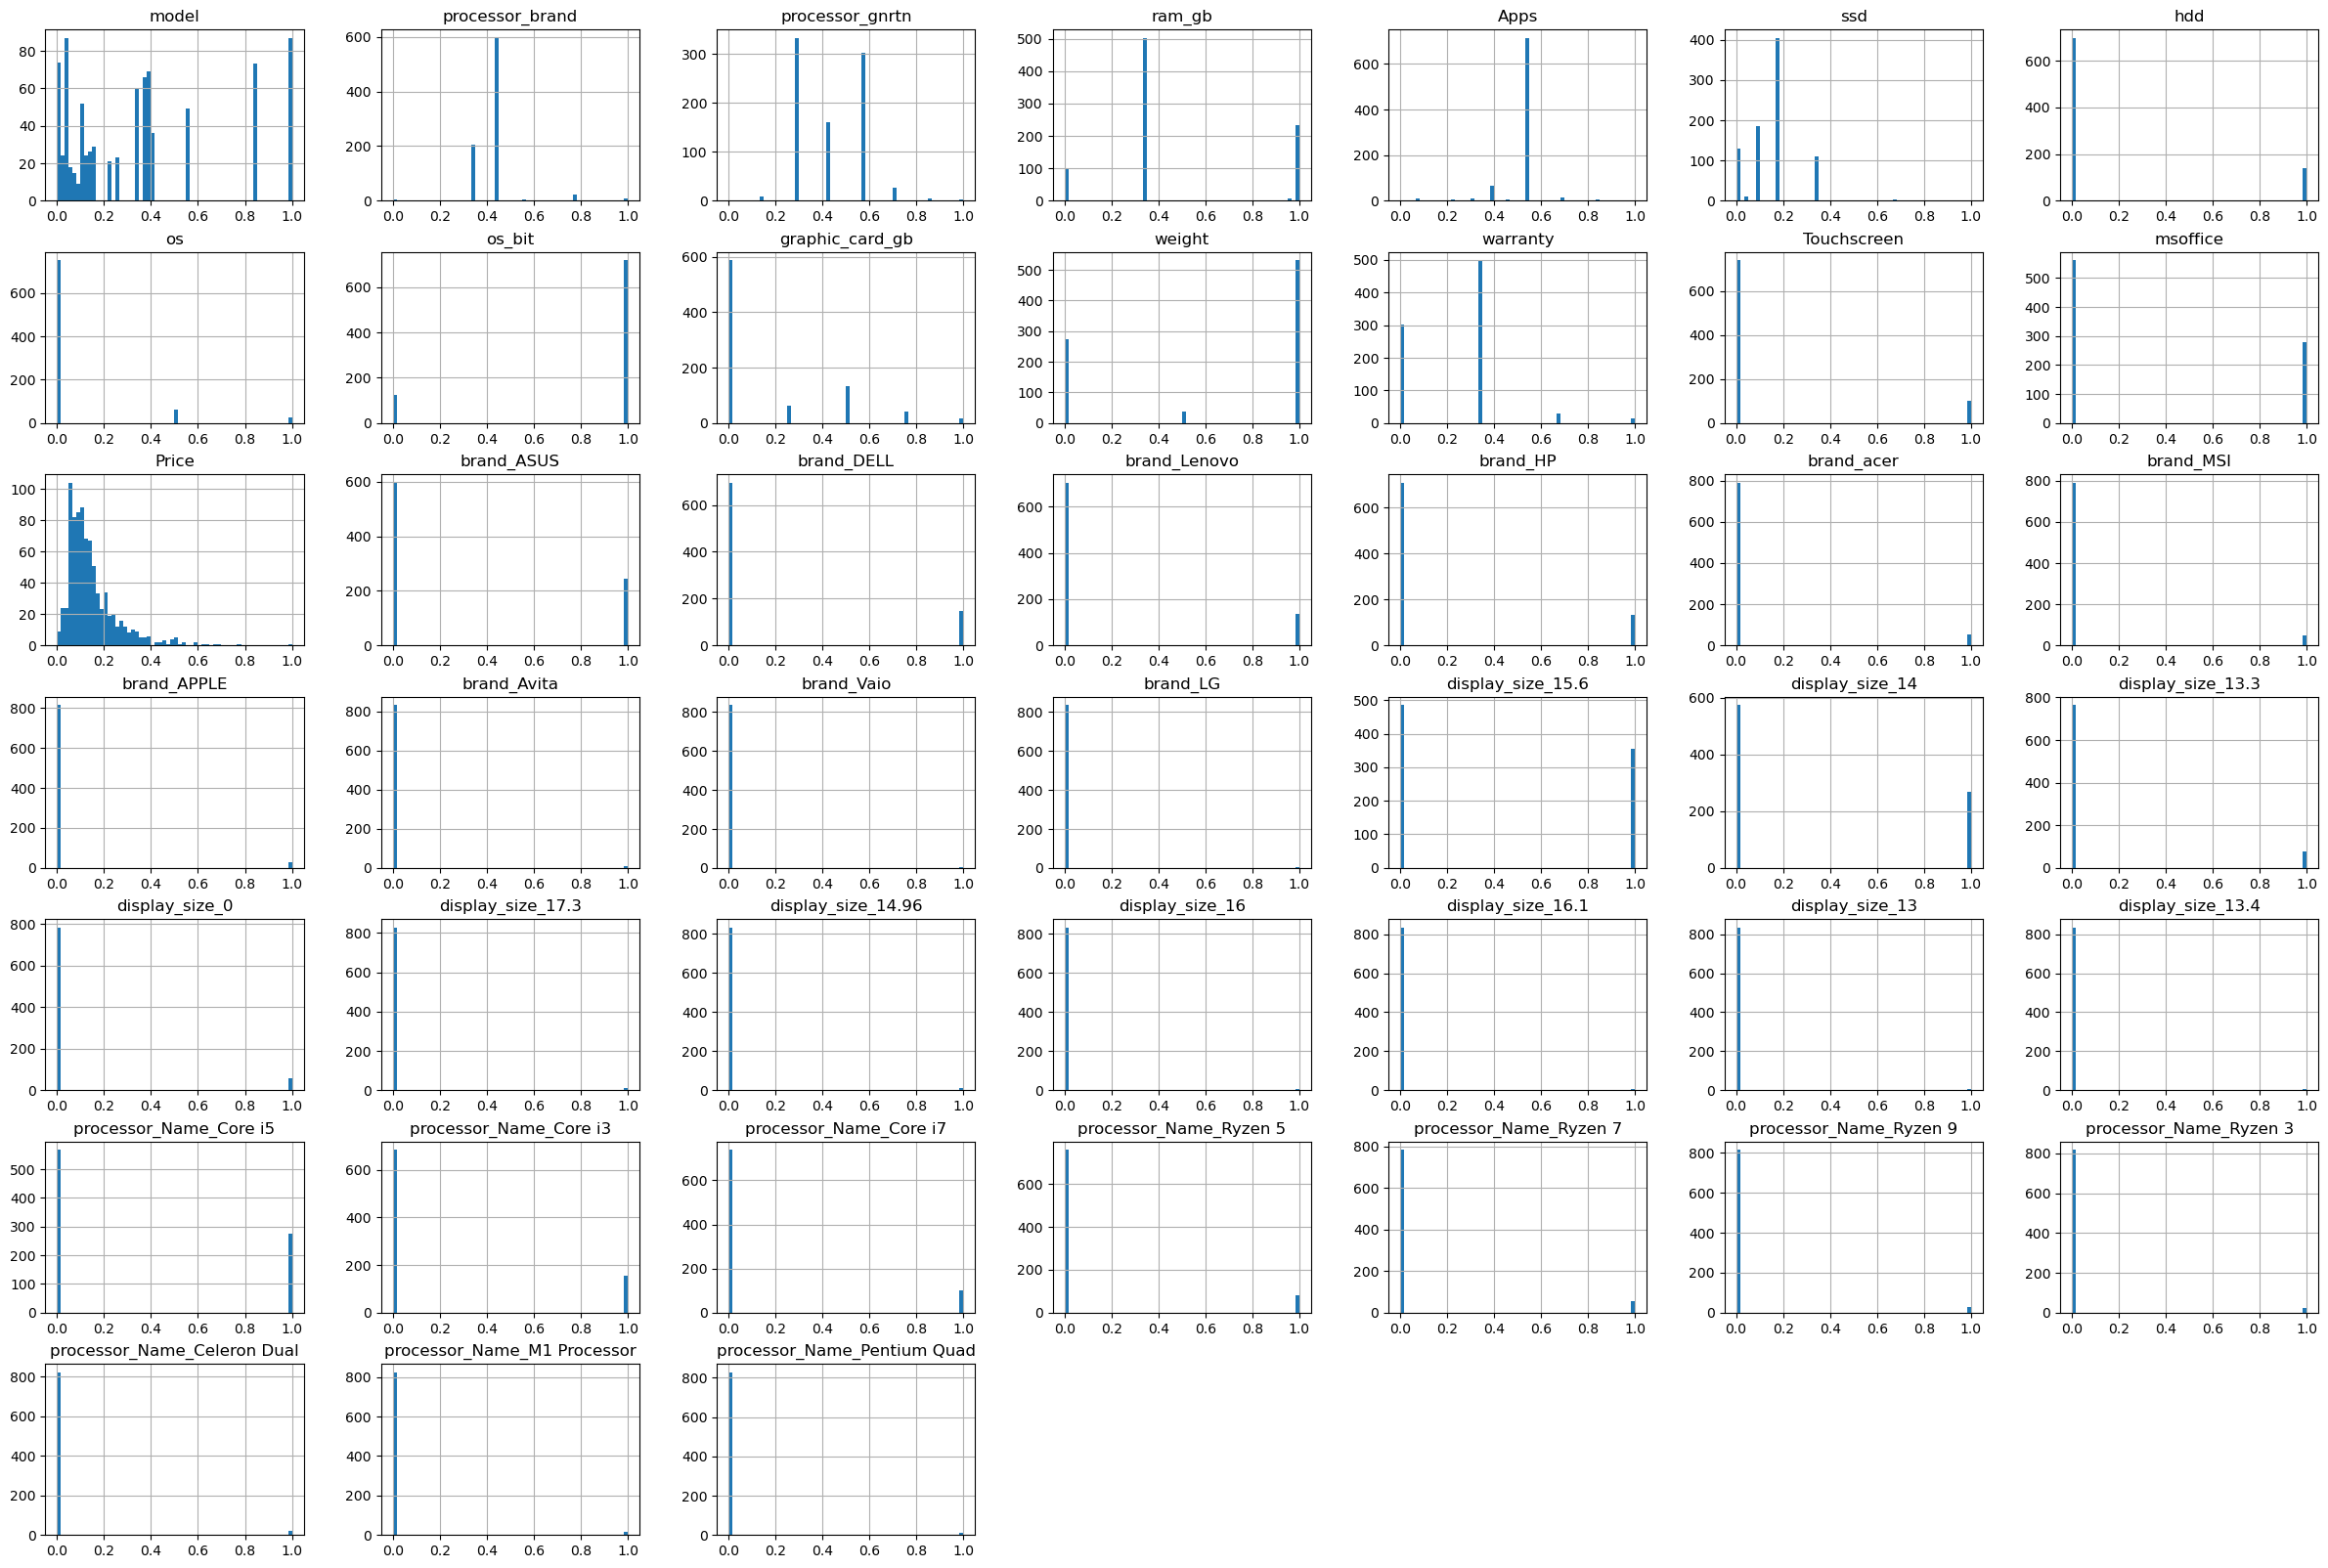

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
df_minMaxScaled.hist(bins=60,figsize=(30,20))
plt.show()

In [62]:
X=df_minMaxScaled.drop(['Price'],axis=1)
X.shape

(842, 44)

In [63]:
y=df_minMaxScaled.pop('Price')
y.shape

(842,)

In [64]:
from sklearn.model_selection import train_test_split

In [95]:
X_train, X_test, y_train, y_test = train_test_split(
  X,y , random_state=1,test_size=0.20)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(673, 44) (169, 44)
(673,) (169,)


In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [97]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [98]:
model.coef_

array([ 1.75105265e-02,  2.57489447e-01,  7.93149511e-02,  1.71998194e-02,
        4.60275739e-02,  6.45559722e-01,  5.48168943e-02,  5.85070330e-02,
       -9.18133957e-03,  1.38327996e-01, -8.40516868e-03,  2.10859376e-02,
        4.83784320e-02, -9.61602903e-03, -2.38644212e-02, -3.07938224e-02,
       -2.07502183e-02, -2.04742456e-02, -1.95320840e-02,  2.62895483e-03,
        4.83423189e-03, -4.83331586e-02, -2.70727743e-02,  4.90064557e-02,
       -6.73233015e-02, -5.17240009e-02, -2.15502613e-02,  1.79635538e-02,
       -1.78776176e-02, -4.54667963e-02, -3.40286582e-02, -8.81610907e-02,
        1.47285984e-02, -5.96215729e-02, -7.11792021e-03, -2.31662544e-02,
       -5.97035178e-04,  1.41756738e-02, -1.24361420e-02, -5.02363008e-03,
        5.01941655e-03, -3.52109292e-02, -6.24555362e-03,  3.38392071e-02])

In [99]:
model.intercept_

-0.08336146176403417

In [100]:
y_pred=model.predict(X_test)
y_pred=pd.DataFrame(y_pred)
y_pred

,0
0,0.049465
1,0.077732
2,0.336453
3,0.068661
4,0.091682
...,...
164,0.124067
165,0.091161
166,0.306808
167,0.226859


In [101]:
mean_squared_error(y_test,y_pred)

0.004292043098708531

In [102]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

ValueError: continuous is not supported

In [103]:
y_test

483    0.070047
187    0.119159
658    0.292056
111    0.071262
265    0.116822
         ...   
445    0.294393
811    0.131308
541    0.271028
676    0.261706
135    0.212617
Name: Price, Length: 169, dtype: float64

In [109]:
from sklearn.tree import DecisionTreeClassifier


In [110]:
tree_clf  = DecisionTreeClassifier(criterion = 'squared_error',max_depth=2)
 
tree_clf .fit(X_train,y_train)
y_model=tree_clf .predict(X_test)

ValueError: Unknown label type: 'continuous'

In [113]:
from sklearn.ensemble import RandomForestRegressor
 
# create regressor object
regressor = RandomForestRegressor(n_estimators=100,
                                  random_state=1)
 
# fit the regressor with x and y data
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [114]:
y_pred=regressor.predict(X_test)


array([0.09513421, 0.09528855, 0.35909012, 0.09699322, 0.1093735 ,
       0.15207967, 0.36998002, 0.1430977 , 0.18116452, 0.06248311,
       0.216021  , 0.13098681, 0.15708255, 0.15980475, 0.09985911,
       0.1609521 , 0.13391909, 0.13313593, 0.1830275 , 0.14571771,
       0.162199  , 0.20473897, 0.07954626, 0.08746755, 0.19060422,
       0.08594723, 0.12358937, 0.13757072, 0.03098033, 0.18889876,
       0.36740444, 0.11243451, 0.28829114, 0.09280428, 0.21209928,
       0.06668278, 0.16676395, 0.23449508, 0.08235481, 0.23409883,
       0.10844626, 0.10301886, 0.02017037, 0.27707886, 0.11968481,
       0.13788203, 0.23660117, 0.09550819, 0.11592848, 0.23091166,
       0.1281692 , 0.1852897 , 0.06247096, 0.13758985, 0.12181673,
       0.24591769, 0.07585848, 0.2045917 , 0.14179764, 0.19164053,
       0.1023114 , 0.24403722, 0.02263131, 0.24053879, 0.11605093,
       0.19420371, 0.15938808, 0.30890249, 0.08671547, 0.06465182,
       0.09962716, 0.04626446, 0.08168082, 0.10391271, 0.12648

In [115]:
mean_squared_error(y_test,y_pred)

0.004292043098708531

In [116]:
accuracy_score(y_test,y_pred)

ValueError: continuous is not supported